# Credit score classification project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

# Train test split
First of all we need to split our data into train, validation and test sets.

Even though there is a test set given in the competition files, we don't have any access to the target variables, so we decided to use train.csv file only

In [2]:
data = pd.read_csv('train.csv') # dataframe contains everything, not only train
# test = pd.read_csv('test.csv') this one doesn't works - missing target value

test_size = 0.2
X = data.drop(columns=["Credit_Score"]).copy()
y = data["Credit_Score"] # the target 


X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=test_size, shuffle=False) 
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=test_size, shuffle=False)

c:\Users\tymot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# merged in order to perfrom preprocessing efficiently
train = X_train.join(y_train)
val = X_val.join(y_val)
test = X_test.join(y_test)

In [4]:
train.to_csv("data/train.csv")
val.to_csv("data/val.csv")
test.to_csv("data/test.csv")

(array([11469.,     0.,     0.,     0.,     0., 33817.,     0.,     0.,
            0., 18714.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

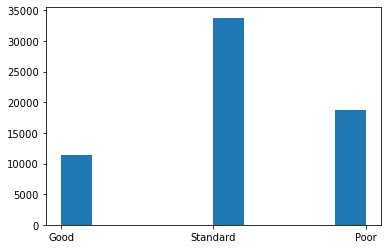

In [5]:
plt.hist(train["Credit_Score"])


<AxesSubplot:>

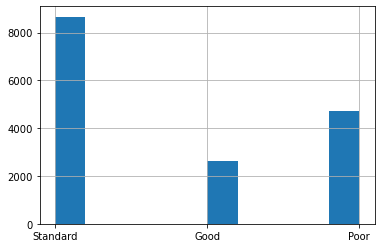

In [6]:
val["Credit_Score"].hist()

the variables are distributed similary

# Data Examination

Let's have a look into our data

In [7]:
train.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64000 entries, 0 to 63999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        64000 non-null  object 
 1   Customer_ID               64000 non-null  object 
 2   Month                     64000 non-null  object 
 3   Name                      57607 non-null  object 
 4   Age                       64000 non-null  object 
 5   SSN                       64000 non-null  object 
 6   Occupation                64000 non-null  object 
 7   Annual_Income             64000 non-null  object 
 8   Monthly_Inhand_Salary     54425 non-null  float64
 9   Num_Bank_Accounts         64000 non-null  int64  
 10  Num_Credit_Card           64000 non-null  int64  
 11  Interest_Rate             64000 non-null  int64  
 12  Num_of_Loan               64000 non-null  object 
 13  Type_of_Loan              56824 non-null  object 
 14  Delay_

In [9]:
train["Customer_ID"].value_counts().loc[train["Customer_ID"].value_counts() != 8].size 
# every customer shows up exactly 8 times

0

In [10]:
train['Credit_Score'].isna().sum() # all target values are present

0

(array([11469.,     0.,     0.,     0.,     0., 33817.,     0.,     0.,
            0., 18714.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

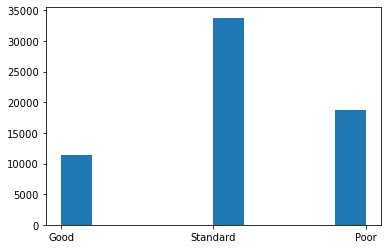

In [11]:
plt.hist(train["Credit_Score"]) # target distribution

In [12]:
train[["Name", "SSN", "Customer_ID"]].head(10) # name, customer id and SSN are redundant - no need to use them

,Name,SSN,Customer_ID
0,Aaron Maashoh,821-00-0265,CUS_0xd40
1,Aaron Maashoh,821-00-0265,CUS_0xd40
2,Aaron Maashoh,821-00-0265,CUS_0xd40
3,Aaron Maashoh,821-00-0265,CUS_0xd40
4,Aaron Maashoh,821-00-0265,CUS_0xd40
5,Aaron Maashoh,821-00-0265,CUS_0xd40
6,Aaron Maashoh,821-00-0265,CUS_0xd40
7,NaN,#F%$D@*&8,CUS_0xd40
8,Rick Rothackerj,004-07-5839,CUS_0x21b1
9,Rick Rothackerj,004-07-5839,CUS_0x21b1


In [13]:
columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Outstanding_Debt',
                    'Amount_invested_monthly', 'Monthly_Balance']

train[columns_to_alter].iloc[10:20] # some columns have weird signs - "_" and are of wrong format

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
10,28,34847.84_,1,-1,5.42,605.03,58.51597569589465,466.46647639764313
11,28,34847.84,1,3_,5.42,605.03,99.30622796053305,465.6762241330048
12,28,34847.84,1,1,6.42,605.03,130.11542024292334,444.8670318506144
13,28,34847.84,1,0,5.42,605.03,43.477190144355745,481.505261949182
14,28,34847.84,1,4,5.42,605.03,70.10177420755677,464.8806778859809
15,28,34847.84,1,4,5.42,605.03,218.90434353388733,356.07810855965045
16,34,143162.64,3,8,7.1,1303.01,168.413702679309,1043.3159778669492
17,34,143162.64,3,6,7.1,1303.01,232.86038375993544,998.8692967863226
18,34,143162.64,3,7,11.1,1303.01,__10000__,715.741367403555
19,34,143162.64,3,5,9.1,1303.01,825.2162699393922,426.5134106068658


In [14]:
# how different are categorical columns

print(train['Payment_of_Min_Amount'].unique(), "\n\n",
      train['Occupation'].unique(), "\n\n",
      train["Credit_Mix"].unique(), "\n\n",
      train["Payment_Behaviour"].unique())

['No' 'NM' 'Yes'] 

 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

 ['_' 'Good' 'Standard' 'Bad'] 

 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [15]:
# account age, and behaviour are in unfriendly format

train[["Credit_History_Age", "Payment_Behaviour"]].head()

,Credit_History_Age,Payment_Behaviour
0,22 Years and 1 Months,High_spent_Small_value_payments
1,NaN,Low_spent_Large_value_payments
2,22 Years and 3 Months,Low_spent_Medium_value_payments
3,22 Years and 4 Months,Low_spent_Small_value_payments
4,22 Years and 5 Months,High_spent_Medium_value_payments


<AxesSubplot:>

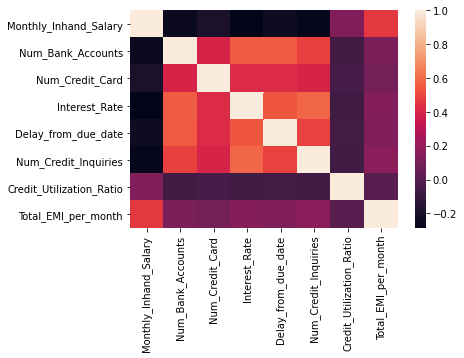

In [16]:
sns.heatmap(train.corr(method="spearman"))

## Search for outliers

In [17]:
description = train.describe()

print(description)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           54425.000000       64000.000000     64000.000000   
mean             4200.666742          17.011688        22.776141   
std              3195.453352         117.426876       130.332827   
min               319.556250          -1.000000         0.000000   
25%              1628.297500           3.000000         4.000000   
50%              3081.902500           6.000000         6.000000   
75%              5967.333333           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   64000.000000         64000.000000          62794.000000   
mean       70.978344            21.120750             27.466223   
std       459.881448            14.823882            190.055037   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Customer_ID'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SSN'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Type_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
  

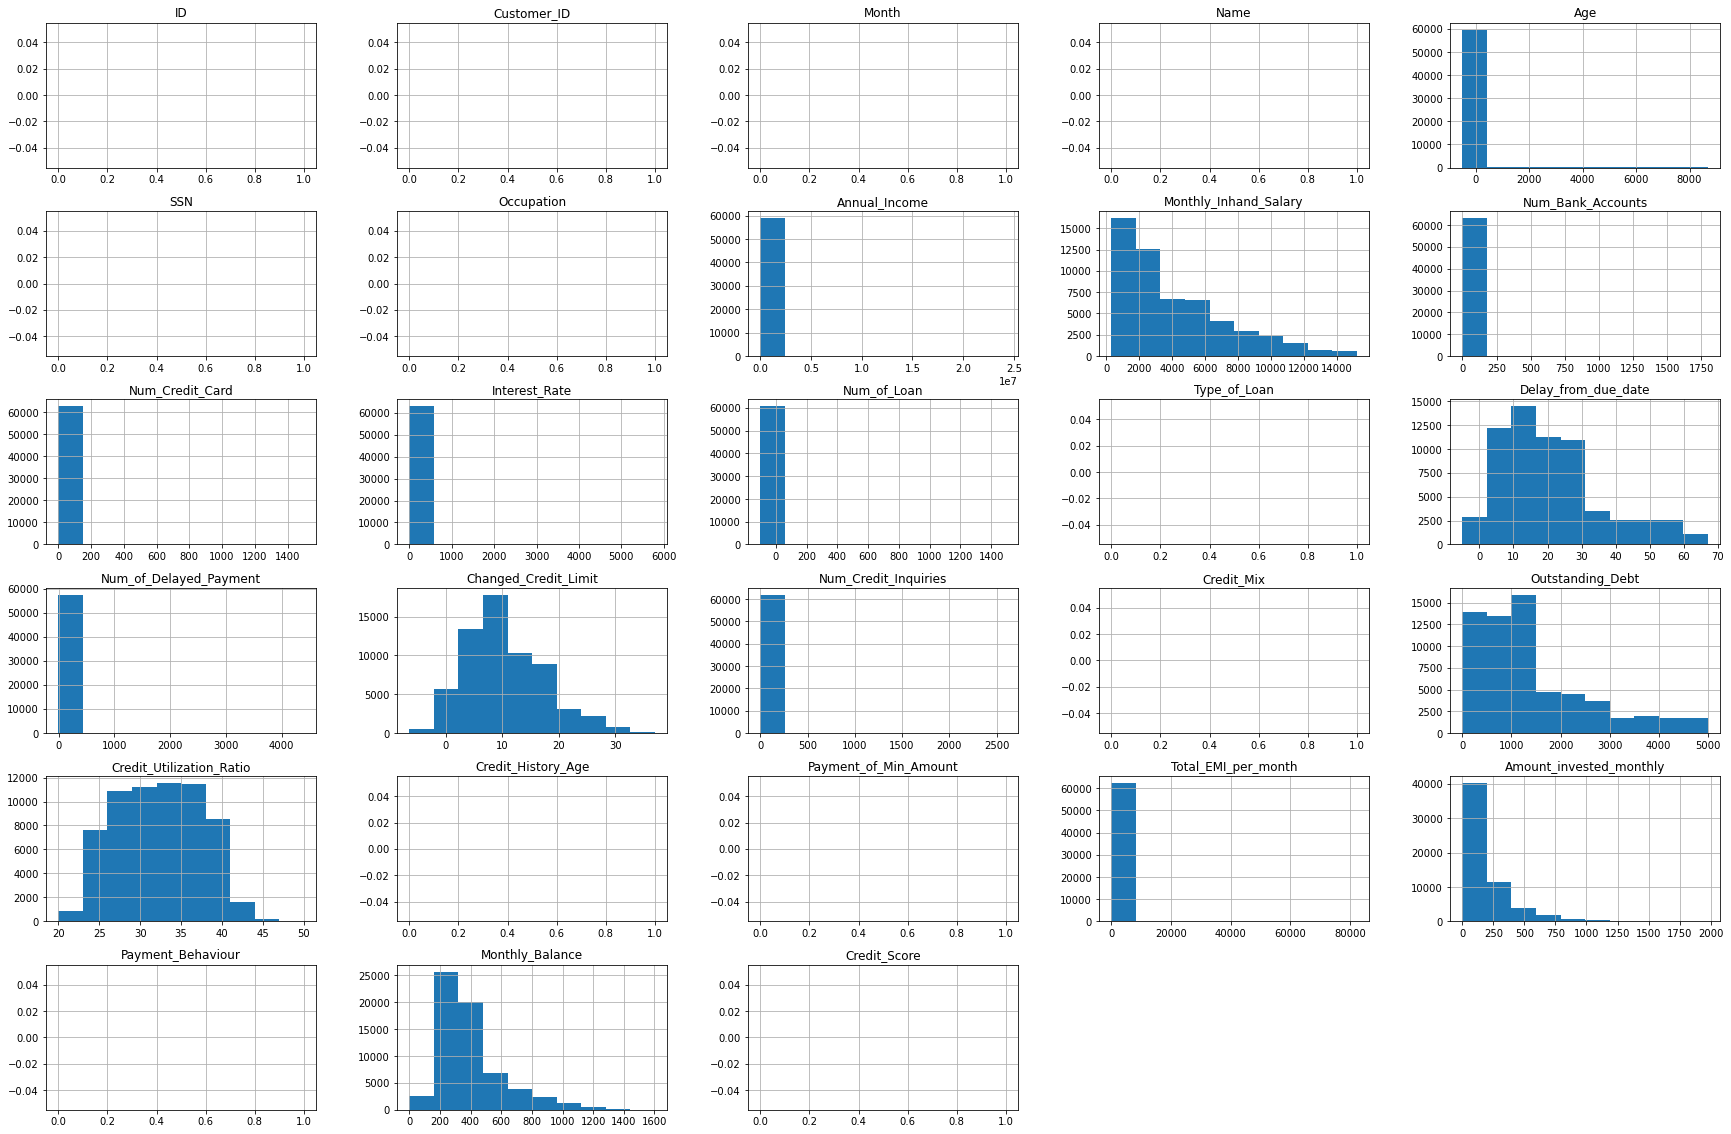

In [18]:
df = train.copy()
for col in train.columns:
    df[col] = pd.to_numeric(train[col], errors='coerce') # errors='coerce', then invalid parsing will be set as NaN

# distribution of all the variables
df.hist(figsize=(30, 20))

Some of the plots look very unusual - they consist of only one column. 
It probably means that those features contain some outliers.

In [19]:
# we choose outliers by looking at the plots

columns_with_outliers = ["Age", "Annual_Income", "Num_Bank_Accounts", 
                         "Num_Credit_Card", "Interest_Rate", 
                         "Num_of_Loan", "Num_of_Delayed_Payment",
                         "Num_Credit_Inquiries", "Total_EMI_per_month"]


df[columns_with_outliers].quantile(0.98)

Age                           56.00
Annual_Income             166891.60
Num_Bank_Accounts             10.00
Num_Credit_Card              187.02
Interest_Rate                 60.08
Num_of_Loan                    9.00
Num_of_Delayed_Payment        25.00
Num_Credit_Inquiries          17.00
Total_EMI_per_month        29527.08
Name: 0.98, dtype: float64

In [20]:
df["Monthly_Inhand_Salary"].max()

15204.633333333331

it looks like 98% of observations contain reasonable information - it is very unlikely that there exists someone with age of 8000 or annual income much bigger than 200000, since the maximum value in column monthly inhand salary equals 15204

<AxesSubplot:>

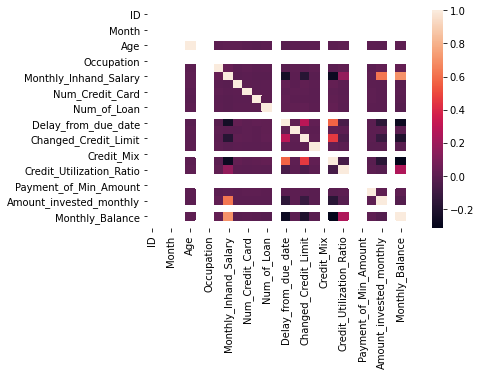

In [21]:
# correlation between columns 
sns.heatmap(df.corr())

<BarContainer object of 3 artists>

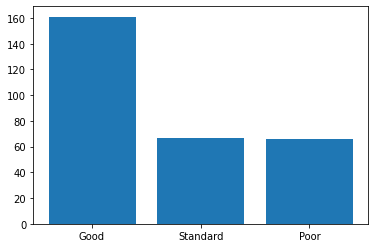

In [22]:
# Monthly_Inhand_Salary is strongly correlated with Monthly_Balance and 
# Amount_Invested_Monthly but those are not correlated with each other

plt.bar(x = train["Credit_Score"].unique(),
        height=train.loc[df["Num_of_Loan"]>=15]["Credit_Score"].value_counts())

# Data Preprocessing

First of all we git rid of columns that carry the same information

In [23]:
def id_columns(df):
    df = df.drop(["Name", "SSN", "ID"], axis="columns") # no added value, all the information in Customer_ID
    df["Customer_ID"] = df["Customer_ID"].apply(lambda x: int(x[4:], 16)) # convert to int
    
    print("Columns containing id-like information preprocessed")
    return df

Here we literally 'clean' the data, removing unnecessary signs that appear randomly

In [24]:
def clear_numeric_data(col):
    # some of the rows contain "_" sign
    col.astype(str).replace("_", "")
    return pd.to_numeric(col, errors="coerce") # errors='coerce', then invalid parsing will be set as NaN

In [25]:
# function for cleaning numeric data where necessary
def altering(df):
    
    columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                        'Changed_Credit_Limit', 'Outstanding_Debt',
                        'Amount_invested_monthly', 'Monthly_Balance']

    df[columns_to_alter] = df[columns_to_alter].apply(clear_numeric_data, axis=1)

    print("Numeric data preprocessed. Columns with numeric values contain numeric only variables. Changed columns types")
    return df

Function below helps with removal outlying values from a column.
If parameter (use_quantiles) is False, removes outliers outside given set range (a, b).
Otherwise removes top 2 quantiles

In [26]:
def delete_outliers(column, a=0, b=0.98, use_quantiles=True):
    # function helps removing quantiles from a column, 
    # if parameter (use_quantiles) is False, removes outliers outside given range (a, b)
    # otherwise removes top quantiles
    
    col = np.where(a < column, column, float('nan'))
    if use_quantiles:
        return np.where(col <= column.quantile(b), column, float('nan'))
    return np.where(col <= b, column, float('nan'))


def handle_outliers(df):
    df["Age"] = np.where((0 > df["Age"]), -df["Age"], df["Age"]) # deleting weird outliers
    df['Age'] = delete_outliers(df["Age"], 0, 100, use_quantiles=False)
    
    df["Annual_Income"] = delete_outliers(df["Annual_Income"], 0, 0.99)
    df["Num_Bank_Accounts"] = delete_outliers(df["Num_Bank_Accounts"])
    df["Num_of_Loan"] = delete_outliers(df["Num_of_Loan"])
    df["Interest_Rate"] = delete_outliers(df["Interest_Rate"])
    df["Num_Credit_Card"] = delete_outliers(df["Num_Credit_Card"], 0, 0.97)
    df["Num_of_Delayed_Payment"] = delete_outliers(df["Num_of_Delayed_Payment"])
    df["Num_Credit_Inquiries"] = delete_outliers(df["Num_Credit_Inquiries"])
    df["Total_EMI_per_month"] = delete_outliers(df["Total_EMI_per_month"], 0, 0.95)


    print("Deleted outliers")   
    
    return df

## Encoding categorical data

In [27]:
train["Occupation"] = np.where(train["Occupation"] == "_______", "Unknown", train["Occupation"])
occupations_list = train["Occupation"].unique()
occupations_list

array(['Scientist', 'Unknown', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

Sometimes when data is missing, it's possible to avail rows that pertain to the same customer and contain missing information.

In [28]:
# first we fill the information for customers that have other rows with full information available
train['Type_of_Loan'].fillna(train.groupby('Customer_ID')['Type_of_Loan'].first(), inplace=True)
# later we fill with ''
train['Type_of_Loan'].fillna('', inplace=True)
    
loan_types_list =  train['Type_of_Loan'].value_counts().head(9).index[1:] 

In [29]:
def encode_categorical(df):
    # encode columns where necessary (Credit_Mix, Payment_of_Min_Amount, Credit_Score)
    # mapping
    credit_mix_dict = {'Bad':0, 'Standard':1, 'Good':2, '_':float('nan')}
    poma_dict = {'No':0, 'Yes':1, 'NM':float('nan')}
    credit_score_dict = {'Poor':0, 'Standard':1, 'Good':2}
    month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5,
                "June": 6, "July": 7, "August": 8}
    
    df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(poma_dict)
    df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_dict)
    df['Credit_Score'] = df['Credit_Score'].map(credit_score_dict)
    df["Month"] = df["Month"].map(month_dict)
    
    # Payment_Behaviour column brings two informations, one about spending, other about value payments
    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    
    del df["Payment_Behaviour"]
    
    
    for loan_type in loan_types_list: # the single types of loans
        df[loan_type] = df['Type_of_Loan'].str.contains(loan_type).astype("bool")
    del df["Type_of_Loan"]
    
    
    # credit history age    
    df['Credit_History_Age'] = df['Credit_History_Age'].apply(history_age)
    
    # Occupation - ____ for uneployed
    df["Occupation"] = np.where(df["Occupation"] == "_______", "Unknown", df["Occupation"])
    df["Occupation"] = np.where(df["Occupation"].isin(occupations_list), df["Occupation"], "Unknown") # to handle different occupations in test data
    df = df.join(pd.get_dummies(df['Occupation']))
    del df["Occupation"]

    print("Categorical columns with string values encoded. Added new columns where necessary (one-hot encoding)")
    
    return df

## handling NaNs

We will impute missing data. In case of some values we look up to rows containing
data about the same customer, using mode/median of values pertaining to him. If for customer
there are no other rows, we impute using globally most common values.

In [30]:
def impute_values(df): # this works but very slowly
    
    continuous_values = ['Monthly_Inhand_Salary', 'Amount_invested_monthly',
                         'Monthly_Balance', 'Credit_History_Age', "Outstanding_Debt",
                         "Changed_Credit_Limit", "Annual_Income"]
    
    for column in continuous_values:
        df[column] = df[column].fillna(df.groupby('Customer_ID')[column].transform("mean"))
    # using mean is not causing any trouble here, we're practically taking the value that appears
    # in the rows with the same id
        
    
    discrete_columns = ["Age", "Num_Credit_Inquiries", "Num_of_Loan", "Credit_Mix",
                        "Num_of_Delayed_Payment", "Num_Credit_Inquiries", 
                        "Spending_Behaviour", "Payment_of_Min_Amount", "Value_Payments"]
    # for discrete values we'll impute nans with mode
    for column in discrete_columns:
        #train[column].fillna(train.groupby('Customer_ID')[column].agg(lambda x: pd.Series.mode(x)[0]), inplace=True) 
        df[column].fillna(df.groupby('Customer_ID')[column].transform('median'), inplace=True) 
        pass
    
    df = df.fillna(df.median()) # in case a customer doesn't have any entries


    print("NA values imputed within numeric columns")

    return df


In [31]:
# processing Credit_History_Age so that's continuous
import re
def history_age(age):
    try : 
        years = int(re.findall('[0-9]+', age)[0])
        month = int(re.findall('[0-9]+', age)[1])
        return years*12 + month
    except :
        return np.nan
    
import re

In [32]:
def impute_discrete_string(df):

    discrete_string_columns = ["Occupation", "Type_of_Loan", "Payment_Behaviour"]
    # fill missing data in columns that are strings

    for column in discrete_string_columns:
        most_common_globally = df[column].agg(lambda x: pd.Series.mode(x)[0])
        df[column].fillna(df.groupby('Customer_ID')[column].agg(
            lambda x: (most_common_globally if len(pd.Series.mode(x)) == 0 else pd.Series.mode(x)[0])
            ), inplace=True) 
        

    print("NA values imputed within text columns")
        
    return df

## Pipeline

In [33]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

drop_transformer = FunctionTransformer(id_columns)
altering_transformer = FunctionTransformer(altering)
outlier_transformer = FunctionTransformer(handle_outliers)
categorical_transformer = FunctionTransformer(encode_categorical)
imputer_transformer = FunctionTransformer(impute_values)
discrete_imputer_transformer = FunctionTransformer(impute_discrete_string)

# all the afore declared processings applied
prepipe = Pipeline([
    ("drop", drop_transformer),
    ("altering", altering_transformer),
    ("outliers", outlier_transformer),
    ("impute_discrete_string", discrete_imputer_transformer),
    ("categorical", categorical_transformer),
    ("impute", imputer_transformer)
])


In [34]:
train = prepipe.fit_transform(train)

Columns containing id-like information preprocessed
Numeric data preprocessed. Columns with numeric values contain numeric only variables. Changed columns types
Deleted outliers
NA values imputed within text columns
Categorical columns with string values encoded. Added new columns where necessary (one-hot encoding)
NA values imputed within numeric columns


In [35]:
# verify the pipe transformation
described = train.describe()

array([[<AxesSubplot:title={'center':'Customer_ID'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <

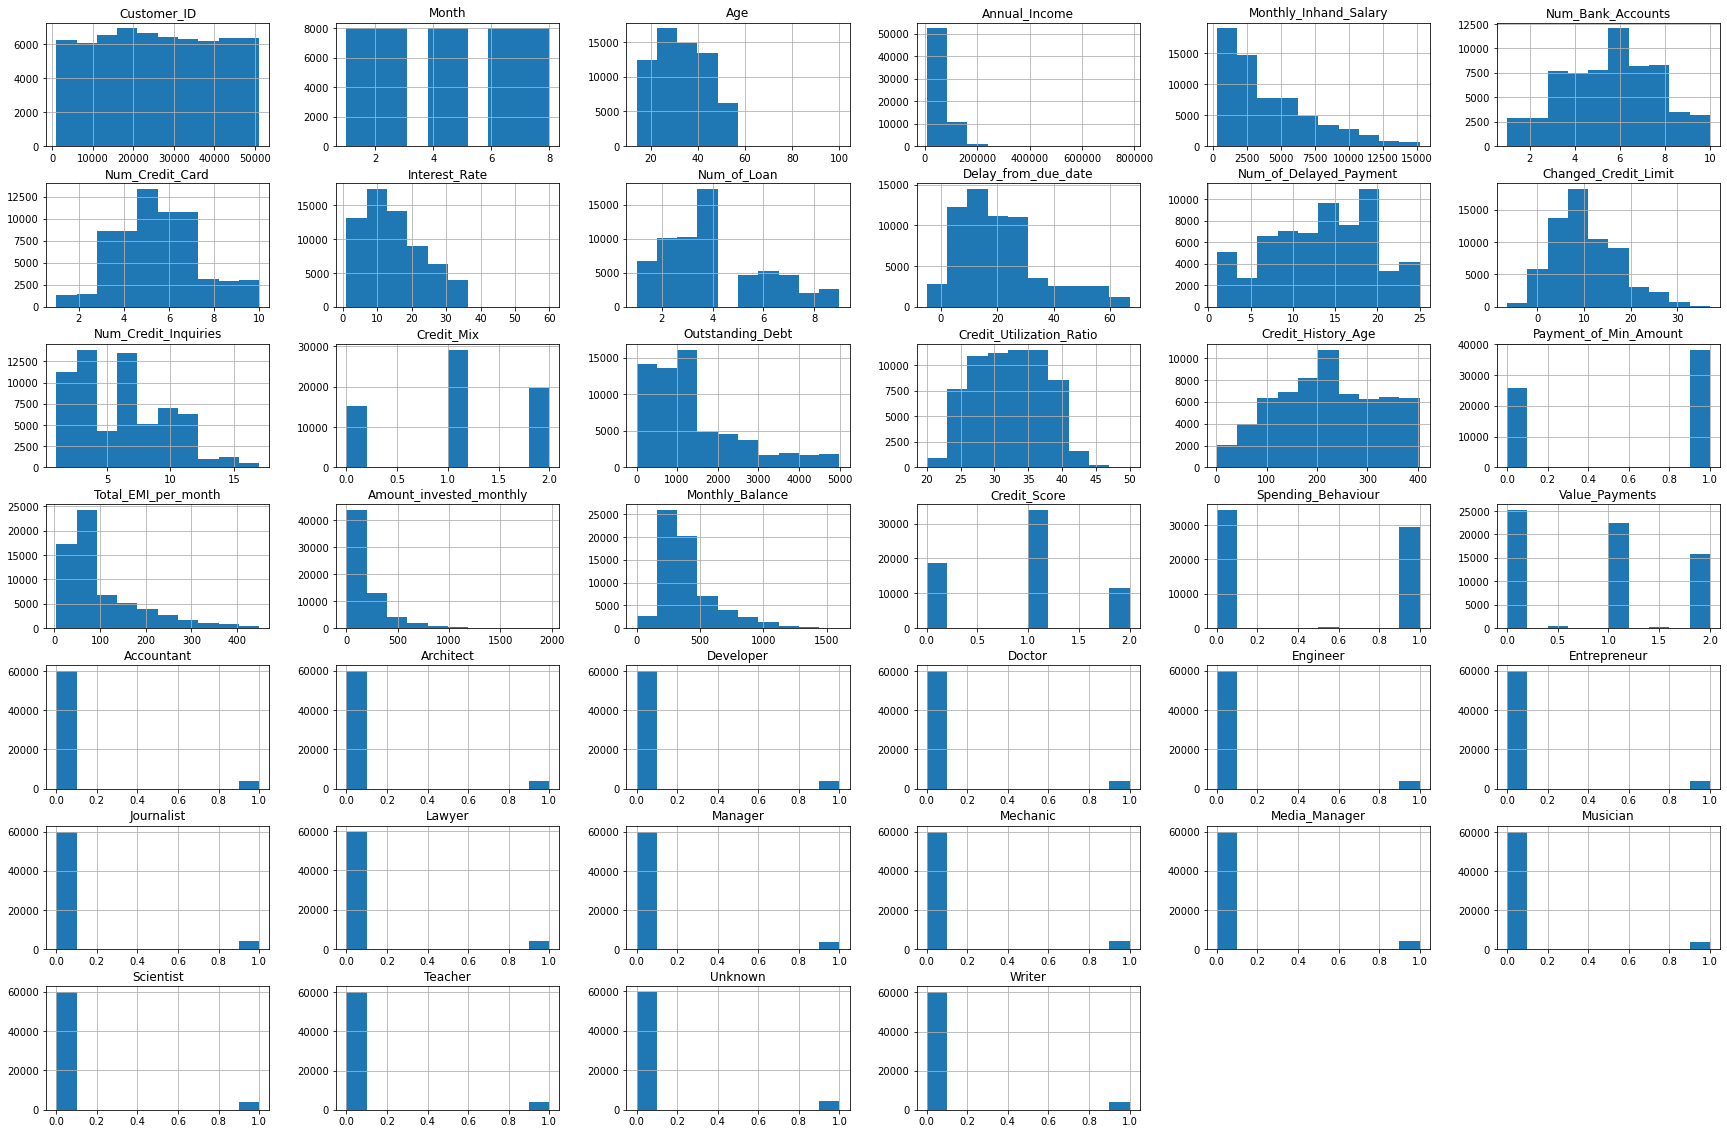

In [36]:
train.hist(figsize=(30, 20))

<AxesSubplot:>

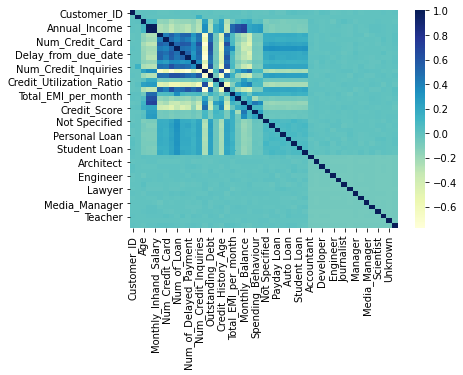

In [37]:
sns.heatmap(train.corr(), cmap="YlGnBu")

# Model

We will initially create the models, to check which features have the highest importance.
Our intention is to drop the irrelevant later after the 1st model fitting.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [39]:
# training dataset
y = train['Credit_Score']
del train['Credit_Score']
y_train = y
X_train = train

In [40]:
# validation dataset
val = prepipe.transform(val)
X_val = val
y_val = val["Credit_Score"]
del X_val["Credit_Score"]

Columns containing id-like information preprocessed
Numeric data preprocessed. Columns with numeric values contain numeric only variables. Changed columns types
Deleted outliers
NA values imputed within text columns
Categorical columns with string values encoded. Added new columns where necessary (one-hot encoding)
NA values imputed within numeric columns


# Random Forest

1st fitting

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rf_model = RandomForestClassifier(n_estimators=120)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [213]:
y_pred = rf_model.predict(X_val)

In [214]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      4403
           1       0.73      0.75      0.74      8444
           2       0.64      0.53      0.58      3153

    accuracy                           0.69     16000
   macro avg       0.68      0.66      0.67     16000
weighted avg       0.69      0.69      0.69     16000



# Verify feature importance in random forest model

In [215]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   X_val.columns,
                                   columns=['Importance'])

In [216]:
feature_importances.sort_values(by='Importance', ascending=False).head(10)

,Importance
Outstanding_Debt,0.094029
Credit_Mix,0.068787
Interest_Rate,0.065170
Credit_History_Age,0.059387
Delay_from_due_date,0.054500
Changed_Credit_Limit,0.049073
Num_Credit_Card,0.040585
Monthly_Balance,0.040552
Amount_invested_monthly,0.039465
Credit_Utilization_Ratio,0.037793


# Dropping highly correlated columns

In [217]:
columns_to_delete = []
for i in range(len(X_train.columns)):
    for j in range(i+1, len(X_train.columns)):
        # we iterate over every pair of columns
        # if the correlation between them is over 0.5 we eliminate the less predictive (for our particular model) column
        if (abs(X_train[X_train.columns[i]].corr(X_train[X_train.columns[j]])) > 0.7):
            if feature_importances.loc[X_train.columns[i]][0] < feature_importances.loc[X_train.columns[j]][0]:
                columns_to_delete.append(feature_importances.loc[X_train.columns[i]].name)
            else:
                columns_to_delete.append(feature_importances.loc[X_train.columns[j]].name)

In [218]:
columns_to_delete.append('Customer_ID')
columns_to_delete = list(set(columns_to_delete)) # get unique values
columns_to_delete

['Payment_of_Min_Amount',
 'Monthly_Inhand_Salary',
 'Interest_Rate',
 'Num_of_Delayed_Payment',
 'Customer_ID',
 'Annual_Income']

In [219]:
X_train_2 = X_train.drop(columns_to_delete, axis=1)
X_val_2 = X_val.drop(columns_to_delete, axis=1) 

In [220]:
feature_importances_2 = feature_importances.loc[feature_importances.index.isin(X_train_2)].sort_values(by='Importance', ascending=False)
feature_importances_2

,Importance
Outstanding_Debt,0.094029
Credit_Mix,0.068787
Credit_History_Age,0.059387
Delay_from_due_date,0.054500
Changed_Credit_Limit,0.049073
Num_Credit_Card,0.040585
Monthly_Balance,0.040552
Amount_invested_monthly,0.039465
Credit_Utilization_Ratio,0.037793
Num_Credit_Inquiries,0.036266


# New model, trained without highly correlated columns

In [221]:
rf_model_2 = RandomForestClassifier(n_estimators=100)
rf_model_2.fit(X_train_2, y_train)

RandomForestClassifier()

In [222]:
y_pred_2 = rf_model_2.predict(X_val_2)

In [223]:
print(classification_report(y_pred_2, y_val))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      4418
           1       0.73      0.74      0.73      8572
           2       0.60      0.52      0.56      3010

    accuracy                           0.69     16000
   macro avg       0.66      0.65      0.66     16000
weighted avg       0.68      0.69      0.68     16000



# XGBoost attempt

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier

In [225]:
gbc_model= GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [226]:
y_pred_xgboost = gbc_model.predict(X_val)

In [227]:
print(classification_report(y_pred_xgboost, y_val))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      4351
           1       0.73      0.75      0.74      8427
           2       0.66      0.54      0.59      3222

    accuracy                           0.70     16000
   macro avg       0.68      0.66      0.67     16000
weighted avg       0.69      0.70      0.69     16000



# Stacked Classifier

In [228]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [229]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   n_jobs=-1)

In [230]:
y_pred = model.predict(X_val)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      4240
           1       0.75      0.73      0.74      8860
           2       0.61      0.55      0.58      2900

    accuracy                           0.70     16000
   macro avg       0.67      0.67      0.67     16000
weighted avg       0.70      0.70      0.70     16000



# Attempt to drop irrelevant features with SelectKBest 

In [231]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [232]:
bestfeatures = SelectKBest(k=10)

In [233]:
fit = bestfeatures.fit(X_train,y_train)

In [234]:
fit.scores_

array([4.78381071e+00, 4.00107511e+01, 8.49721330e+02, 1.33840612e+03,
       1.49516193e+03, 5.00194713e+03, 5.98143338e+03, 9.25898486e+03,
       3.72131677e+03, 7.25459533e+03, 5.51425243e+03, 1.74620115e+03,
       7.06616872e+03, 1.14521115e+04, 5.61755859e+03, 6.60751011e+01,
       5.64908739e+03, 9.10897385e+03, 6.27194860e+01, 8.30285366e+02,
       1.39416227e+03, 2.87501667e+02, 2.86493339e+02, 5.91010078e+02,
       6.22699993e+02, 5.99176798e+02, 6.00616462e+02, 7.37530145e+02,
       6.18279951e+02, 6.14347072e+02, 5.37599583e+02, 3.67357075e+00,
       1.93172232e+00, 3.55413317e+00, 2.71446480e-01, 1.49388953e+01,
       4.30350174e-01, 7.72380350e+00, 2.77792301e+00, 4.36311000e-01,
       2.89439655e+00, 3.02378608e+00, 9.76627923e-02, 4.92649303e+00,
       2.00724211e+00, 3.41780464e-01, 2.91126886e+01])

In [235]:
featureScores = pd.DataFrame(fit.scores_, X_train.columns,  columns=['Importance_Score'])
featureScores = featureScores.sort_values(by='Importance_Score', ascending=False).head(20)

In [236]:
featureScores

,Importance_Score
Credit_Mix,11452.111478
Interest_Rate,9258.984865
Payment_of_Min_Amount,9108.973853
Delay_from_due_date,7254.595331
Num_Credit_Inquiries,7066.168720
Num_Credit_Card,5981.433376
Credit_History_Age,5649.087390
Outstanding_Debt,5617.558586
Num_of_Delayed_Payment,5514.252428
Num_Bank_Accounts,5001.947129


# New model without features with less importance

In [237]:
X_train_3 = X_train[featureScores.index]
X_val_3 = X_val[featureScores.index]

In [238]:
model.fit(X_train_3, y_train)

C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   n_jobs=-1)

In [239]:
y_pred = model.predict(X_val_3)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      4213
           1       0.73      0.74      0.74      8525
           2       0.66      0.53      0.59      3262

    accuracy                           0.69     16000
   macro avg       0.68      0.66      0.67     16000
weighted avg       0.69      0.69      0.69     16000



# lazy predict

In [41]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)
models

100%|██████████| 29/29 [42:00<00:00, 86.91s/it]   


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.62,0.68,None,0.62,0.19
LGBMClassifier,0.70,0.68,None,0.70,2.46
GaussianNB,0.61,0.67,None,0.61,0.22
RandomForestClassifier,0.70,0.67,None,0.70,23.17
SVC,0.68,0.67,None,0.68,402.03
ExtraTreesClassifier,0.68,0.66,None,0.68,15.94
NearestCentroid,0.58,0.66,None,0.59,0.17
XGBClassifier,0.69,0.66,None,0.69,17.49
LinearDiscriminantAnalysis,0.65,0.64,None,0.65,0.91


In [240]:
# not in current use
import shap

def shapley(model, X_train, X_val):
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[1])
    
    shap.plots.heatmap(shap_values)
    
    # fig = shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)
    # fig.savefig('testplot.png')
    # fig.plot()
    
    # fig = shap.force_plot(shap_values, X_train)
    # fig.plot()
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")

co trzeba poprawic

sposob przygotowania danych zalezy od modelu ktory chcemy zastosowac

te imputacje danych moze byc jakas taka lepsza 